# Numerical Linear Algebra Lab

## Iterative Solvers: Update Jacobi to Gauss-Seidel

We learned in the lecture about the Jacobi interation method for solving $\mathbf{x}$ in the linear equation $A \mathbf{x} = \mathbf{b}$.
The algorithm states that by applying the update rule:
\begin{align}
  x_i^{(k+1)} = \frac{1}{a_{ii}} \Big(b_i - \sum_{j \neq i} a_{ij} x_j^{(k)}\Big),
\end{align}
$x_i^{(k+1)}$ will converge to the solution $\mathbf{x}$.

We implemeneted and test it in python:

In [1]:
def jacobi_iteration(A, b, max_iter=1000, tol=1e-8):
    """
    Solve A x = b using Jacobi iteration.
    A is assumed to be square with non-zero diagonal.
    """
    n = A.shape[0]
    x = np.zeros(n)
    
    for k in range(max_iter):
        x_old = np.copy(x)
        for i in range(n):
            # Sum over off-diagonal terms
            s = 0.0
            for j in range(n):
                if j != i:
                    s += A[i,j] * x_old[j]
            x[i] = (b[i] - s) / A[i, i]
        
        # Check for convergence
        if np.linalg.norm(x - x_old, ord=np.inf) < tol:
            print(f"Jacobi converged in {k+1} iterations.")
            return x
    
    print("Jacobi did not fully converge within max_iter.")
    return x

In [2]:
import numpy as np

A = np.array([[4.0, -1.0, 0.0],
              [-1.0, 4.0, -1.0],
              [0.0, -1.0, 4.0]], dtype=float)
b = np.array([6.0, 6.0, 6.0], dtype=float)

x_jacobi = jacobi_iteration(A, b)

print("Jacobi solution:", x_jacobi)
print("Direct solve comparison:", np.linalg.solve(A, b))

Jacobi converged in 20 iterations.
Jacobi solution: [2.14285714 2.57142857 2.14285714]
Direct solve comparison: [2.14285714 2.57142857 2.14285714]


For the first hands-on, please update the above Jacobi algorithm and turn it into a working Gauss Seidel algorithm.

Recalling from the lecture that the update step in the Gauss Seidel algorithm is:
\begin{align}
     x_i^{(k+1)} = \frac{1}{a_{ii}} \Big( b_i - \sum_{j < i} a_{ij} x_j^{(k+1)} - \sum_{j > i} a_{ij} x_j^{(k)} \Big).
\end{align}
Note that $\mathbf{x}^{(k+1)}$ is already partially updated (for $j < i$).

In [3]:
def gauss_seidel_iteration(A, b, max_iter=1000, tol=1e-8):
    """
    Solve A x = b using the Gauss-Seidel iteration.
    A is assumed to be square with non-zero diagonal.
    """
    n = A.shape[0]
    x = np.zeros(n)

    for k in range(max_iter):
        x_old = np.copy(x)
        for i in range(n):
            # Sum over known terms
            s1 = 0.0
            for j in range(i):
                s1 += A[i, j] * x[j]  # x[j] is updated
            s2 = 0.0
            for j in range(i+1, n):
                s2 += A[i, j] * x_old[j]  # x_old[j] is from previous iteration
            x[i] = (b[i] - s1 - s2) / A[i, i]

        # Check convergence
        if np.linalg.norm(x - x_old, ord=np.inf) < tol:
            print(f"Gauss-Seidel converged in {k+1} iterations.")
            return x

    print("Gauss-Seidel did not fully converge within max_iter.")
    return x

In [4]:
x_gs = gauss_seidel_iteration(A, b)

print("Jacobi solution:", x_jacobi)
print("Gauss-Seidel solution:", x_gs)
print("Direct solve comparison:", np.linalg.solve(A, b))

Gauss-Seidel converged in 11 iterations.
Jacobi solution: [2.14285714 2.57142857 2.14285714]
Gauss-Seidel solution: [2.14285714 2.57142857 2.14285714]
Direct solve comparison: [2.14285714 2.57142857 2.14285714]


## Coupled Harmonic Oscillators

Harmonic oscillators are a classic problem in physics, often forming the basis of more complex vibrational analyses.
In this part, you will:
1. Derive or reference the analytical solution for two coupled oscillators.
2. Numerically solve the same system (using an eigenvalue approach).
3. Generalize to $n$ (and even $n \times n$) coupled oscillators, visualizing the mode shapes.

### Two Coupled Oscillators--Analytical Solution

Consider two masses $m$ connected by three springs (constant $k$), arranged in a line and connected to two walls:
```
|--k--[m]--k--[m]--k--|
```

If each mass can move only horizontally, the equations of motion form a $2 \times 2$ eigenvalue problem.

Let:
* $x_1(t)$ be the horizontal displacement of **Mass 1** from its equilibrium position.
* $x_2(t)$ be the horizontal displacement of **Mass 2**.

We assume **small oscillations**, so Hooke’s law applies linearly.

* **Mass 1** experiences:
  1. A restoring force $-k \,x_1$ from the left wall spring.
  2. A coupling force from the middle spring:
     if $x_2 > x_1$, that spring pulls Mass 1 to the right;
     if $x_1 > x_2$, it pulls Mass 1 to the left.
     The net contribution is $-k (x_1 - x_2)$.

  Summing forces (Newton's second law) gives:
  \begin{align}
  m \, \ddot{x}_1 = -k\,x_1 - k\,(x_1 - x_2).
  \end{align}

* **Mass 2** experiences:
  1. A restoring force $-k\,x_2$ from the right wall spring.
  2. The coupling force from the middle spring: $-k(x_2 - x_1)$.

  Hence,
  \begin{align}
  m \, \ddot{x}_2 = -k\,x_2 - k\,(x_2 - x_1).
  \end{align}



Rewrite each equation:
\begin{align}
\begin{cases}
m\,\ddot{x}_1 + 2k\,x_1 -  k\,x_2 = 0,\\
m\,\ddot{x}_2 -  k\,x_1 + 2k\,x_2 = 0.
\end{cases}
\end{align}

We can write $\mathbf{x} = \begin{pmatrix}x_1 \\ x_2\end{pmatrix}$ and express the system as:
\begin{align}
m \,\ddot{\mathbf{x}} + K\,\mathbf{x} = \mathbf{0},
\end{align}
where
\begin{align}
m \,\ddot{\mathbf{x}} = m \begin{pmatrix}\ddot{x}_1 \\[6pt] \ddot{x}_2\end{pmatrix}, \quad
K = \begin{pmatrix}
2k & -k \\
-k & 2k
\end{pmatrix}.
\end{align}

Equivalently,
\begin{align}
\ddot{\mathbf{x}} + \frac{1}{m}\,K \,\mathbf{x} = \mathbf{0}.
\end{align}
This is a **second-order linear system** describing small oscillations.

We look for solutions of the form
\begin{align}
\mathbf{x}(t) = \mathbf{x}(0)\, e^{\,i\,\omega\,t},
\end{align}
where $\mathbf{x}(0)$ is the initial condition and $\omega$ is the (angular) oscillation frequency.

Plugging into $m\,\ddot{\mathbf{x}} + K\,\mathbf{x} = 0$ gives:
\begin{align}
-\,m\,\omega^2 \,\mathbf{X} + K\,\mathbf{X} = \mathbf{0}
\quad \Longrightarrow \quad
\left(K - m\,\omega^2 I\right)\,\mathbf{X} = \mathbf{0}.
\end{align}
Nontrivial solutions exist only if
\begin{align}
\det(K - m\,\omega^2 I) = 0,
\end{align}
which is the **eigenvalue problem** for $\omega^2$.

Explicitly, $K - m\,\omega^2 I$ is:
\begin{align}
\begin{pmatrix}
2k - m\,\omega^2 & -k \\
-k & 2k - m\,\omega^2
\end{pmatrix}.
\end{align}

The determinant is:
\begin{align}
(2k - m\,\omega^2)(2k - m\,\omega^2) - (-k)(-k)
= (2k - m\,\omega^2)^2 - k^2.
\end{align}

Setting this to zero results 
\begin{align}
2k - m\,\omega^2 = \pm\,k.
\end{align}

Hence, we get **two** solutions for $\omega^2$:
1. **$\omega_+^2$**: taking the $+$ sign:
   \begin{align}
   2k - m\,\omega_+^2 = k \quad \Longrightarrow \quad \omega_+^2 = \frac{k}{m} \quad \Longrightarrow \quad \omega_1 = \sqrt{\frac{k}{m}}.
   \end{align}
2. **$\omega_-^2$**: taking the $-$ sign:
   \begin{align}
   2k - m\,\omega_-^2 = -\,k \quad \Longrightarrow \quad \omega_-^2 = \frac{3k}{m} \quad \Longrightarrow \quad \omega_2 = \sqrt{\frac{3k}{m}}.
   \end{align}

For each of the normal modes:

* **Lower Frequency** $\omega_+ = \sqrt{k/m}$:
  Plug $\omega_+^2 = k/m$ back into $(K - m\,\omega_+^2 I)\mathbf{X} = 0$.
  For instance,
  \begin{align}
    \begin{pmatrix}
    2k - k & -k \\
    -k & 2k - k
    \end{pmatrix}
    \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
    = \begin{pmatrix}
    k & -k \\
    -k & k
    \end{pmatrix}
    \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
    = \mathbf{0}.
  \end{align}
  This implies $x_1 = x_2$.
  Physically, the **in-phase** mode has both masses moving together.

* **Higher Frequency** $\omega_- = \sqrt{3k/m}$:
  \begin{align}
    \begin{pmatrix}
    2k - 3k & -k \\
    -k & 2k - 3k
    \end{pmatrix}
    \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
    = \begin{pmatrix}
    -k & -k \\
    -k & -k
    \end{pmatrix}
    \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
    = \mathbf{0}.
  \end{align}
  This yields $x_1 = -x_2$.
  Physically, the **out-of-phase** mode has the two masses moving in opposite directions.

We can compute the position of these coupled oscillators according to the analytical solutions.

In [5]:
# Physical constants
m = 1.0     # mass
k = 1.0     # spring constant

# Frequencies for two normal modes
omegap = np.sqrt(k/m)      # in-phase
omegam = np.sqrt(3*k/m)    # out-of-phase

# Initial conditions
x1_0 = 0
x2_0 = 0.5

# The analytical solution:
def X_analytic(t):
    xp_0 = (x1_0 + x2_0) / 2
    xm_0 = (x1_0 - x2_0) / 2

    xp = xp_0 * np.cos(omegap * t)
    xm = xm_0 * np.cos(omegam * t)

    return np.array([xp + xm, xp - xm])

Plot multiple frames:

In [6]:
from pathlib import Path

from tqdm import tqdm

import matplotlib.pyplot    as plt
import matplotlib.animation as animation

def mkplots(X, t_max=10, n_frames=201):
    T = np.linspace(0, t_max, n_frames)

    Path("plots").mkdir(parents=True, exist_ok=True)
    Xs = []
    for t in T:
        Xs.append(X(t))
    Xs = np.array(Xs)

    for i, t in tqdm(enumerate(T)):
        plt.axhline(y=T[i], color='k', zorder=-1)
        for j in range(Xs.shape[-1]):
            plt.plot(j+1+Xs[:i+1,j], T[:i+1])
            plt.scatter(j+1+Xs[i,j], T[i])
        plt.xlim(0, Xs.shape[-1]+1)        
        plt.xlabel(r'$x_i$')
        plt.ylabel(r'$t$')
        plt.savefig(f"plots/{i:04}.png")
        plt.close()

In [7]:
! rm -rf plots/
mkplots(X_analytic)

0it [00:00, ?it/s]

1it [00:00,  4.74it/s]

3it [00:00,  9.31it/s]

5it [00:00, 10.14it/s]

7it [00:00, 11.29it/s]

9it [00:00, 10.43it/s]

11it [00:01, 11.32it/s]

13it [00:01, 11.95it/s]

15it [00:01, 12.37it/s]

17it [00:01, 12.37it/s]

19it [00:01, 12.72it/s]

21it [00:01, 13.20it/s]

23it [00:01, 13.17it/s]

25it [00:02, 13.28it/s]

27it [00:02, 13.01it/s]

29it [00:02, 13.03it/s]

31it [00:02, 12.84it/s]

33it [00:02, 12.84it/s]

35it [00:02, 12.86it/s]

37it [00:03, 12.72it/s]

39it [00:03, 12.59it/s]

41it [00:03, 12.14it/s]

43it [00:03, 12.47it/s]

45it [00:03, 12.65it/s]

47it [00:03, 12.98it/s]

49it [00:03, 13.02it/s]

51it [00:04, 12.89it/s]

53it [00:04, 12.80it/s]

55it [00:04, 13.01it/s]

57it [00:04, 13.31it/s]

59it [00:04, 13.52it/s]

61it [00:05, 10.84it/s]

63it [00:05, 11.58it/s]

65it [00:05, 12.05it/s]

67it [00:05, 12.38it/s]

69it [00:05, 12.38it/s]

71it [00:05, 12.61it/s]

73it [00:05, 12.72it/s]

75it [00:06, 12.67it/s]

77it [00:06, 12.79it/s]

79it [00:06, 12.62it/s]

81it [00:06, 12.67it/s]

83it [00:06, 12.83it/s]

85it [00:06, 13.32it/s]

87it [00:06, 13.39it/s]

89it [00:07, 13.65it/s]

91it [00:07, 13.69it/s]

93it [00:07, 13.83it/s]

95it [00:07, 13.86it/s]

97it [00:07, 13.89it/s]

99it [00:07, 13.87it/s]

101it [00:07, 13.85it/s]

103it [00:08, 13.82it/s]

105it [00:08, 13.78it/s]

107it [00:08, 13.63it/s]

109it [00:08, 13.67it/s]

111it [00:08, 13.63it/s]

113it [00:09, 10.24it/s]

115it [00:09, 11.20it/s]

117it [00:09, 11.82it/s]

119it [00:09, 12.20it/s]

121it [00:09, 12.58it/s]

123it [00:09, 12.95it/s]

125it [00:09, 13.07it/s]

127it [00:10, 12.70it/s]

129it [00:10, 12.65it/s]

131it [00:10, 12.92it/s]

133it [00:10, 13.10it/s]

135it [00:10, 13.14it/s]

137it [00:10, 13.15it/s]

139it [00:10, 12.98it/s]

141it [00:11, 13.04it/s]

143it [00:11, 13.07it/s]

145it [00:11, 13.05it/s]

147it [00:11, 13.06it/s]

149it [00:11, 12.92it/s]

151it [00:11, 13.03it/s]

153it [00:12, 13.02it/s]

155it [00:12, 12.98it/s]

157it [00:12, 12.87it/s]

159it [00:12, 12.83it/s]

161it [00:12, 12.88it/s]

163it [00:13,  9.11it/s]

165it [00:13, 10.11it/s]

167it [00:13, 11.11it/s]

169it [00:13, 12.00it/s]

171it [00:13, 12.46it/s]

173it [00:13, 12.81it/s]

175it [00:13, 13.27it/s]

177it [00:14, 13.56it/s]

179it [00:14, 13.83it/s]

181it [00:14, 13.99it/s]

183it [00:14, 14.08it/s]

185it [00:14, 14.08it/s]

187it [00:14, 14.16it/s]

189it [00:14, 14.26it/s]

191it [00:15, 13.96it/s]

193it [00:15, 14.07it/s]

195it [00:15, 14.06it/s]

197it [00:15, 13.88it/s]

199it [00:15, 13.80it/s]

201it [00:15, 13.81it/s]

201it [00:15, 12.75it/s]

Can combine them into a movie using `ffmpeg`:

In [8]:
# This installs `ffmpeg` if it is not available

! if [ ! $(which ffmpeg) ]; then apt update && apt install ffmpeg; fi

zsh:1: condition expected: not


In [9]:
# This convert all image files in "plots/" into "movie.mpg"

! rm -rf movie-2.mpg && ffmpeg -i plots/%04d.png -qmax 2 movie-2.mpg

zsh:1: command not found: ffmpeg


### Two Coupled Oscillators--Semi-Analytical/Numerical Solution

Instead of solving the coupled oscillator problem analytically, we can at least solve the eigenvalue part of the problem numerically.

In [10]:
# HANDSON: Step 1. rewrite the analytical solution in matrix form

# Physical constants
m = 1.0     # mass
k = 1.0     # spring constant

# Frequencies for two normal modes
Omega = np.array([np.sqrt(k/m), np.sqrt(3*k/m)]) # this should become a numpy array

# Initial conditions
X0 = np.array([0, 0.5]) # this should become a numpy array
M0 = np.array([
    [1/2,  1/2],
    [1/2, -1/2],
]) @ X0 # apply an transformation to rewrite the transformation in terms of eigenvectors

# The analytical solution in matrix notation:
def X_matrix(t): # closure on `M0` and `Omega`
    M = M0 * np.cos(Omega * t)
    return np.array([
        [1,  1],
        [1, -1],
    ]) @ M # apply an inverse transformation to rewrite the modes in terms of x1 and x2

In [11]:
print(X_analytic(1))
print(X_matrix(1))

[0.17521471 0.09493644]
[0.17521471 0.09493644]


In [12]:
# HANDSON: Step 2. Replace the manual solutions of eigenvalues Omega and the transform by calling `np.linalg.eig()`

K = np.array([
    [2*k/m, - k/m],
    [- k/m, 2*k/m],
])

# Initial conditions
X0 = np.array([0, 0.5]) # this should become a numpy array

# The semi-analytical solution in matrix notation:
Omega2, V = np.linalg.eig(K)
Omega     = np.sqrt(Omega2)
M0        = V.T @ X0

def X_numeric(t): # closure on `M0` and `Omega`
    return V @ (M0 * np.cos(Omega * t))

In [13]:
print(X_analytic(1))
print(X_numeric(1))

[0.17521471 0.09493644]
[0.17521471 0.09493644]


In [14]:
# HANDSON: Step 3. Generalize the solution to work for arbitrary number of coupled oscillators

K = np.array([
    [2*k/m, - k/m,   0  ],
    [- k/m, 2*k/m, - k/m],
    [  0,   - k/m, 2*k/m],
])

# Initial conditions
X0 = np.array([0,0,0.5]) #should become a numpy array

# The semi-analytical solution in matrix notation:
Omega2, V = np.linalg.eig(K)
Omega     = np.sqrt(Omega2)
M0        = V.T @ X0

In [15]:
! rm -rf plots/
mkplots(X_numeric)
! rm -rf movie-3.mpg && ffmpeg -i plots/%04d.png -qmax 2 movie-3.mpg

0it [00:00, ?it/s]

2it [00:00, 11.47it/s]

4it [00:00, 11.52it/s]

6it [00:00, 11.57it/s]

8it [00:00, 11.41it/s]

10it [00:00, 11.25it/s]

12it [00:01, 11.53it/s]

14it [00:01,  5.39it/s]

16it [00:01,  6.50it/s]

17it [00:02,  6.94it/s]

19it [00:02,  8.01it/s]

21it [00:02,  8.97it/s]

23it [00:02,  9.77it/s]

25it [00:02, 10.34it/s]

27it [00:03,  9.69it/s]

29it [00:03,  9.73it/s]

31it [00:03, 10.15it/s]

33it [00:03, 10.28it/s]

35it [00:03, 10.64it/s]

37it [00:03, 10.68it/s]

39it [00:04, 10.71it/s]

41it [00:04, 10.82it/s]

43it [00:04, 11.28it/s]

45it [00:04, 11.66it/s]

47it [00:04, 11.86it/s]

49it [00:04, 11.74it/s]

51it [00:05, 11.89it/s]

53it [00:05, 11.97it/s]

55it [00:05, 11.90it/s]

57it [00:05, 12.03it/s]

59it [00:05, 11.98it/s]

61it [00:06,  9.53it/s]

63it [00:06, 10.12it/s]

65it [00:06, 10.60it/s]

67it [00:06, 10.94it/s]

69it [00:06, 11.11it/s]

71it [00:06, 11.22it/s]

73it [00:07, 11.36it/s]

75it [00:07, 11.40it/s]

77it [00:07, 11.41it/s]

79it [00:07, 11.38it/s]

81it [00:07, 11.20it/s]

83it [00:08, 10.90it/s]

85it [00:08, 11.35it/s]

87it [00:08, 11.61it/s]

89it [00:08, 11.82it/s]

91it [00:08, 12.09it/s]

93it [00:08, 12.19it/s]

95it [00:08, 12.18it/s]

97it [00:09, 12.23it/s]

99it [00:09, 12.19it/s]

101it [00:09, 12.14it/s]

103it [00:09, 12.05it/s]

105it [00:09, 12.09it/s]

107it [00:10,  9.19it/s]

109it [00:10,  9.83it/s]

111it [00:10, 10.45it/s]

113it [00:10, 10.91it/s]

115it [00:10, 11.07it/s]

117it [00:11, 11.17it/s]

119it [00:11, 11.20it/s]

121it [00:11, 10.92it/s]

123it [00:11, 11.02it/s]

125it [00:11, 11.30it/s]

127it [00:11, 11.14it/s]

129it [00:12, 11.37it/s]

131it [00:12, 11.52it/s]

133it [00:12, 11.55it/s]

135it [00:12, 11.52it/s]

137it [00:12, 11.50it/s]

139it [00:12, 11.53it/s]

141it [00:13, 11.52it/s]

143it [00:13, 11.56it/s]

145it [00:13, 11.55it/s]

147it [00:13, 11.57it/s]

149it [00:13, 11.57it/s]

151it [00:13, 11.59it/s]

153it [00:14, 11.51it/s]

155it [00:14,  8.17it/s]

157it [00:14,  8.94it/s]

159it [00:14,  9.52it/s]

161it [00:15,  9.91it/s]

163it [00:15, 10.18it/s]

165it [00:15, 10.65it/s]

167it [00:15, 11.16it/s]

169it [00:15, 11.58it/s]

171it [00:15, 11.77it/s]

173it [00:16, 11.91it/s]

175it [00:16, 11.96it/s]

177it [00:16, 12.14it/s]

179it [00:16, 12.27it/s]

181it [00:16, 12.19it/s]

183it [00:16, 12.29it/s]

185it [00:17, 12.33it/s]

187it [00:17, 12.37it/s]

189it [00:17, 12.27it/s]

191it [00:17, 12.35it/s]

193it [00:17, 12.28it/s]

195it [00:17, 12.06it/s]

197it [00:18, 11.96it/s]

199it [00:18, 11.66it/s]

201it [00:18, 11.54it/s]

201it [00:18, 10.91it/s]

zsh:1: command not found: ffmpeg


In [16]:
N = 4
K = (np.diag(np.repeat(2*k/m, N  )    ) +
     np.diag(np.repeat(- k/m, N-1), +1) +
     np.diag(np.repeat(- k/m, N-1), -1) )

print(K)

# Initial conditions
X0 = np.concatenate([np.zeros(N-1), [0.5]])

# The semi-analytical solution in matrix notation:
Omega2, V = np.linalg.eig(K)
Omega     = np.sqrt(Omega2)
M0        = V.T @ X0

[[ 2. -1.  0.  0.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2. -1.]
 [ 0.  0. -1.  2.]]


In [17]:
! rm -rf plots/
mkplots(X_numeric)
! rm -rf movie-4.mpg && ffmpeg -i plots/%04d.png -qmax 2 movie-4.mpg

0it [00:00, ?it/s]

1it [00:00,  9.64it/s]

3it [00:00, 11.11it/s]

5it [00:00, 11.03it/s]

7it [00:01,  4.27it/s]

9it [00:01,  5.58it/s]

11it [00:01,  6.90it/s]

13it [00:01,  8.03it/s]

15it [00:01,  8.89it/s]

17it [00:02,  9.55it/s]

19it [00:02, 10.28it/s]

21it [00:02, 10.77it/s]

23it [00:02, 11.23it/s]

25it [00:02, 11.31it/s]

27it [00:03, 11.50it/s]

29it [00:03, 11.34it/s]

31it [00:03, 11.37it/s]

33it [00:03, 11.21it/s]

35it [00:03, 11.37it/s]

37it [00:03, 11.33it/s]

39it [00:04, 11.38it/s]

41it [00:04, 11.27it/s]

43it [00:04,  9.26it/s]

45it [00:04,  9.61it/s]

47it [00:04,  9.99it/s]

49it [00:05, 10.22it/s]

51it [00:05, 10.32it/s]

53it [00:05,  9.97it/s]

55it [00:05, 10.26it/s]

57it [00:05,  8.89it/s]

59it [00:06,  9.37it/s]

61it [00:06,  9.71it/s]

63it [00:06,  9.98it/s]

65it [00:06, 10.15it/s]

67it [00:06, 10.32it/s]

69it [00:07, 10.32it/s]

71it [00:07, 10.37it/s]

73it [00:07, 10.31it/s]

75it [00:07, 10.34it/s]

77it [00:07, 10.37it/s]

79it [00:08, 10.28it/s]

81it [00:08, 10.28it/s]

83it [00:08, 10.41it/s]

85it [00:08, 10.71it/s]

87it [00:08, 10.92it/s]

89it [00:08, 11.09it/s]

91it [00:09, 11.15it/s]

93it [00:09, 11.25it/s]

95it [00:09, 11.31it/s]

97it [00:09, 11.25it/s]

99it [00:09, 11.22it/s]

101it [00:10, 11.16it/s]

103it [00:10, 11.17it/s]

105it [00:10, 11.16it/s]

107it [00:10,  9.03it/s]

109it [00:10,  9.53it/s]

111it [00:11,  9.81it/s]

113it [00:11, 10.08it/s]

115it [00:11, 10.27it/s]

117it [00:11, 10.34it/s]

119it [00:11, 10.34it/s]

121it [00:12, 10.34it/s]

123it [00:12, 10.33it/s]

125it [00:12, 10.27it/s]

127it [00:12, 10.27it/s]

129it [00:12, 10.19it/s]

131it [00:13, 10.23it/s]

133it [00:13, 10.22it/s]

135it [00:13, 10.21it/s]

137it [00:13, 10.12it/s]

139it [00:13, 10.08it/s]

141it [00:14,  9.90it/s]

142it [00:14,  9.86it/s]

143it [00:14,  9.82it/s]

144it [00:14,  9.77it/s]

145it [00:14,  9.71it/s]

146it [00:14,  9.65it/s]

147it [00:14,  9.61it/s]

148it [00:14,  9.62it/s]

149it [00:14,  9.62it/s]

150it [00:14,  9.55it/s]

151it [00:15,  9.57it/s]

152it [00:15,  9.57it/s]

153it [00:15,  9.60it/s]

154it [00:15,  9.54it/s]

155it [00:15,  5.87it/s]

156it [00:15,  6.62it/s]

157it [00:15,  7.27it/s]

158it [00:16,  7.79it/s]

159it [00:16,  8.17it/s]

160it [00:16,  8.44it/s]

161it [00:16,  8.64it/s]

162it [00:16,  8.85it/s]

163it [00:16,  8.94it/s]

164it [00:16,  9.05it/s]

166it [00:16,  9.59it/s]

168it [00:17,  9.77it/s]

170it [00:17,  9.92it/s]

171it [00:17,  9.93it/s]

172it [00:17,  9.92it/s]

174it [00:17, 10.02it/s]

176it [00:17, 10.09it/s]

178it [00:18, 10.07it/s]

180it [00:18, 10.12it/s]

182it [00:18, 10.10it/s]

184it [00:18, 10.10it/s]

186it [00:18, 10.04it/s]

188it [00:19,  9.98it/s]

189it [00:19,  9.94it/s]

190it [00:19,  9.89it/s]

191it [00:19,  9.81it/s]

192it [00:19,  9.69it/s]

193it [00:19,  9.64it/s]

194it [00:19,  9.56it/s]

195it [00:19,  9.49it/s]

196it [00:19,  9.42it/s]

197it [00:20,  9.44it/s]

198it [00:20,  9.45it/s]

199it [00:20,  9.45it/s]

200it [00:20,  9.47it/s]

201it [00:20,  9.37it/s]

201it [00:20,  9.83it/s]

zsh:1: command not found: ffmpeg


In [18]:
N = 16
K = (np.diag(np.repeat(2*k/m, N  )    ) +
     np.diag(np.repeat(- k/m, N-1), +1) +
     np.diag(np.repeat(- k/m, N-1), -1) )

print(K)

# Initial conditions
X0 = np.concatenate([np.zeros(N-1), [0.5]])

# The semi-analytical solution in matrix notation:
Omega2, V = np.linalg.eig(K)
Omega     = np.sqrt(Omega2)
M0        = V.T @ X0

[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. 

0it [00:00, ?it/s]

1it [00:00,  4.62it/s]

2it [00:00,  4.64it/s]

3it [00:01,  1.95it/s]

4it [00:01,  2.52it/s]

5it [00:01,  2.98it/s]

6it [00:01,  3.39it/s]

7it [00:02,  3.66it/s]

8it [00:02,  3.86it/s]

9it [00:02,  3.98it/s]

10it [00:02,  4.14it/s]

11it [00:03,  4.23it/s]

12it [00:03,  4.31it/s]

13it [00:03,  4.35it/s]

14it [00:03,  4.36it/s]

15it [00:03,  4.37it/s]

16it [00:04,  4.37it/s]

17it [00:04,  4.31it/s]

18it [00:04,  4.37it/s]

19it [00:04,  4.42it/s]

20it [00:05,  4.40it/s]

21it [00:05,  4.38it/s]

22it [00:05,  4.38it/s]

23it [00:05,  4.36it/s]

24it [00:06,  4.34it/s]

25it [00:06,  4.33it/s]

26it [00:06,  4.30it/s]

27it [00:06,  4.30it/s]

28it [00:07,  4.27it/s]

29it [00:07,  4.19it/s]

30it [00:07,  4.16it/s]

31it [00:07,  4.14it/s]

32it [00:07,  4.08it/s]

33it [00:08,  4.06it/s]

34it [00:08,  4.06it/s]

35it [00:08,  3.60it/s]

36it [00:09,  3.71it/s]

37it [00:09,  3.76it/s]

38it [00:09,  3.80it/s]

39it [00:09,  3.84it/s]

40it [00:10,  3.83it/s]

41it [00:10,  3.84it/s]

42it [00:10,  3.90it/s]

43it [00:10,  3.94it/s]

44it [00:11,  3.98it/s]

45it [00:11,  4.01it/s]

46it [00:11,  4.03it/s]

47it [00:11,  4.04it/s]

48it [00:12,  4.05it/s]

49it [00:12,  4.03it/s]

50it [00:12,  4.02it/s]

51it [00:12,  4.02it/s]

52it [00:13,  4.01it/s]

53it [00:13,  4.02it/s]

54it [00:13,  4.02it/s]

55it [00:13,  4.01it/s]

56it [00:14,  4.02it/s]

57it [00:14,  4.00it/s]

58it [00:14,  4.00it/s]

59it [00:14,  3.99it/s]

60it [00:15,  3.96it/s]

61it [00:15,  3.97it/s]

62it [00:15,  3.98it/s]

63it [00:15,  3.96it/s]

64it [00:16,  3.96it/s]

65it [00:16,  3.94it/s]

66it [00:16,  3.30it/s]

67it [00:17,  3.47it/s]

68it [00:17,  3.59it/s]

69it [00:17,  3.65it/s]

70it [00:17,  3.72it/s]

71it [00:18,  3.78it/s]

72it [00:18,  3.81it/s]

73it [00:18,  3.84it/s]

74it [00:18,  3.86it/s]

75it [00:19,  3.85it/s]

76it [00:19,  3.82it/s]

77it [00:19,  3.79it/s]

78it [00:19,  3.77it/s]

79it [00:20,  3.76it/s]

80it [00:20,  3.74it/s]

81it [00:20,  3.74it/s]

82it [00:20,  3.73it/s]

83it [00:21,  3.79it/s]

84it [00:21,  3.83it/s]

85it [00:21,  3.86it/s]

86it [00:22,  3.87it/s]

87it [00:22,  3.89it/s]

88it [00:22,  3.91it/s]

89it [00:22,  3.91it/s]

90it [00:23,  3.92it/s]

91it [00:23,  3.93it/s]

92it [00:23,  3.91it/s]

93it [00:23,  3.91it/s]

94it [00:24,  3.91it/s]

95it [00:24,  3.91it/s]

96it [00:24,  3.92it/s]

97it [00:24,  3.91it/s]

98it [00:25,  3.10it/s]

99it [00:25,  3.30it/s]

100it [00:25,  3.46it/s]

101it [00:26,  3.57it/s]

102it [00:26,  3.65it/s]

103it [00:26,  3.72it/s]

104it [00:26,  3.73it/s]

105it [00:27,  3.78it/s]

106it [00:27,  3.81it/s]

107it [00:27,  3.82it/s]

108it [00:27,  3.84it/s]

109it [00:28,  3.86it/s]

110it [00:28,  3.85it/s]

111it [00:28,  3.87it/s]

112it [00:28,  3.85it/s]

113it [00:29,  3.87it/s]

114it [00:29,  3.88it/s]

115it [00:29,  3.87it/s]

115it [00:29,  3.86it/s]

KeyboardInterrupt: 

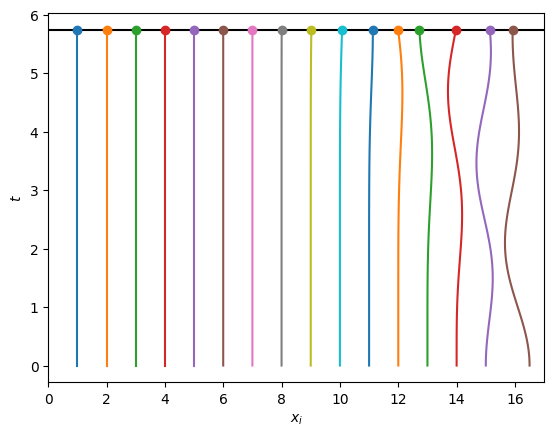

In [19]:
! rm -rf plots/
mkplots(X_numeric, t_max=100, n_frames=2001)
! rm -rf movie-16.mpg && ffmpeg -i plots/%04d.png -qmax 2 movie-16.mpg